Lab 2: Wine Quality Classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Plotting the heatmap of correleation to see the correlation between the different variables

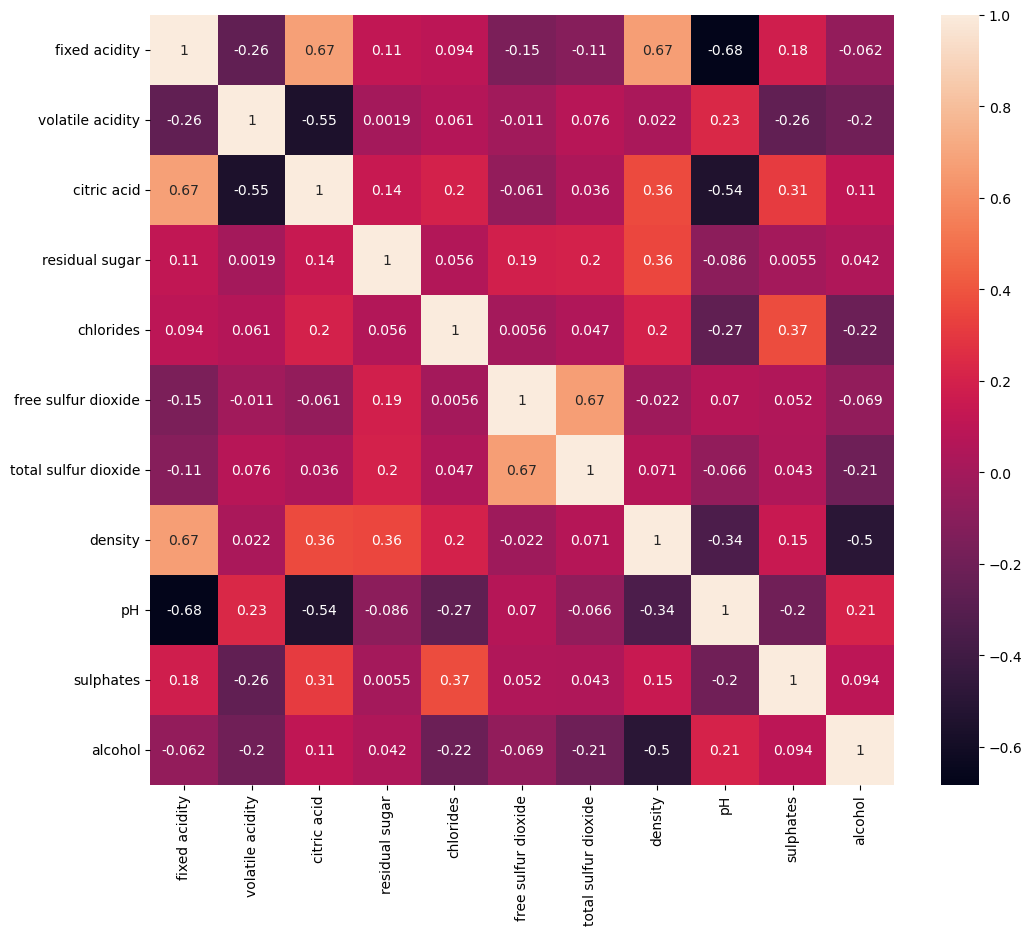

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_red.iloc[:, :-1].corr(), annot=True)
plt.show()

c:\Users\Dynabook\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


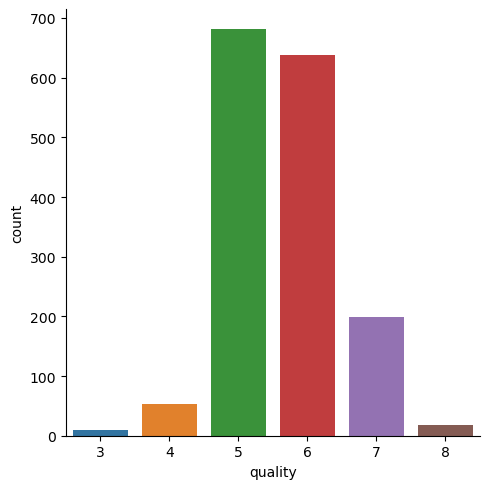

In [6]:
#testing the uniqueness in the values of quality
df_red["quality"].unique()
sns.catplot(x='quality', data=df_red, kind='count')

In [7]:
df_red["quality"] = df_red["quality"].apply(lambda x: 1 if x >= 7 else 0)
df_red["quality"].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [8]:
#some metrics
model_names = []
model_scores = []
labels = ["bad", "good"]

In [9]:
X = df_red.drop('quality', axis=1)
y = df_red['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [10]:
scaler = StandardScaler()

# Fit and transform the training data
X_train= scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

# Random Forest Classifier

It's like multiple number of decision tree. the lower numbers of decision tree the more accurate the model will be.

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


In [13]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Model Evaluation

Accuracy Score


In [14]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9375

Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.99      0.96       277
           1       0.93      0.58      0.71        43

    accuracy                           0.94       320
   macro avg       0.93      0.79      0.84       320
weighted avg       0.94      0.94      0.93       320

RandomForest:  0.9375


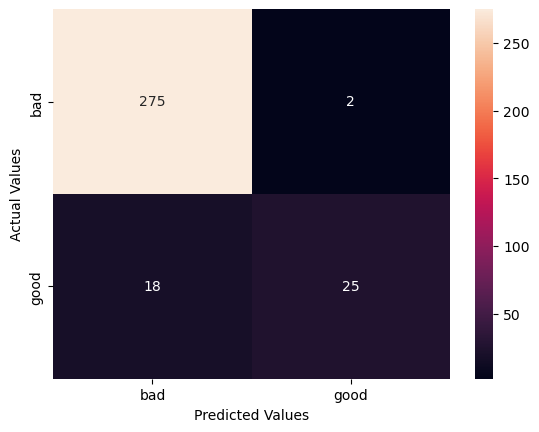

In [15]:
print("Classification Report:\n ", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

sc = accuracy_score(y_test, y_pred)
print("RandomForest: ", sc)
model_names.append("RandomForest")
model_scores.append(sc)


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.89375

Classification Report:
                precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320

RandomForest:  0.89375


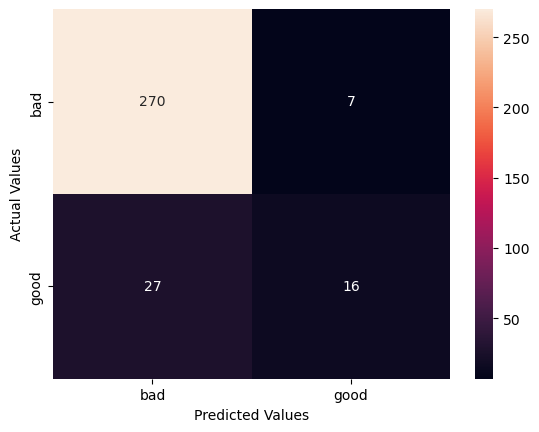

In [18]:
print("Classification Report:\n ", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

sc = accuracy_score(y_test, y_pred)
print("RandomForest: ", sc)
model_scores.append("Logistic Regression")
model_scores.append(sc)
